In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
# Step 2: Load the Dataset
df=pd.read_csv("D:\Desktop\Dharmik ML\python\Extended_Employee_Performance_and_Productivity_Data.csv")
df.head()


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Admin\AppData\Local\Temp\ipykernel_7532\2971280485.py:2: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("D:\Desktop\Dharmik ML\python\Extended_Employee_Performance_and_Productivity_Data.csv")
C:\Users\Admin\AppData\Local\Temp\ipykernel_7532\2971280485.py:2: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("D:\Desktop\Dharmik ML\python\Extended_Employee_Performance_and_Productivity_Data.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Desktop\\Dharmik ML\\python\\Extended_Employee_Performance_and_Productivity_Data.csv'

In [ ]:
# Step 3: Explore the Target Column
df['Performance_Score'].value_counts()


Performance_Score
1    20120
2    20013
3    19999
4    19940
5    19928
Name: count, dtype: int64

In [ ]:
# Step 4: Encode Target Variable (e.g., "Low", "Good", "Excellent" → numeric classes)
label_encoder = LabelEncoder()
df['Performance_Score'] = label_encoder.fit_transform(df['Performance_Score'])


In [ ]:
# Step 5: Handle Missing Values (if any)
df = df.dropna()  # or use df.fillna()


In [ ]:
# Step 6: Encode Categorical Features
categorical_cols = df.select_dtypes(include='object').columns

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [ ]:
# Step 7: Split Data into Features and Target
X = df_encoded.drop('Performance_Score', axis=1)
y = df_encoded['Performance_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 8: Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 9: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

Accuracy: 0.98625

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4037
           1       0.99      0.98      0.99      4102
           2       0.99      0.99      0.99      3968
           3       0.98      0.98      0.98      3906
           4       0.99      0.99      0.99      3987

    accuracy                           0.99     20000
   macro avg       0.99      0.99      0.99     20000
weighted avg       0.99      0.99      0.99     20000



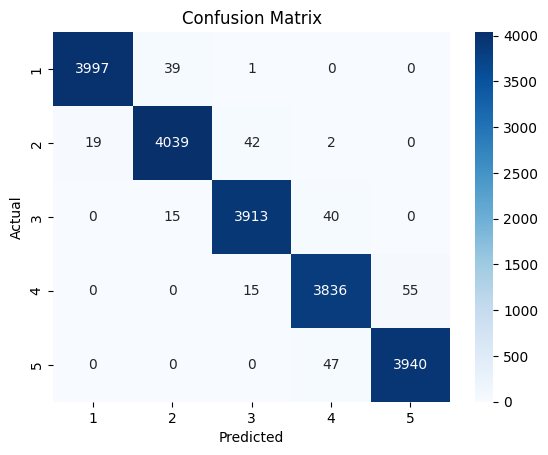

In [ ]:
# Step 10: Make Predictions and Evaluate
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import joblib

# Save the trained Random Forest model
joblib.dump(model, 'employee_performance_model.pkl')



NameError: name 'model' is not defined